# New York Request Callls Analysis 
In this notebook , I have tried to analyse the data on service request calls from New yYork City.
I have used tried to visualize various types of trends in data . I have tried to analyse what variables affect the closing duration of each request .

I have performed the data analysis in Python with the help of Numpy, Pandas, Matplotlib, Scipy, StatsModel and Seaborn libraries 

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

The Dataset contains data about service request calls in New York City

In [2]:
#  Importing the dataset
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [3]:
#Visualizing the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#Getting the columnss 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

#### Shape Of Dataset 

In [5]:
#Dataset Shape 
df.shape

(364558, 53)

### Summarising Null Values in Dataset 

In [6]:
#Identifying Variables with null values 
nullcol = 100*df.isnull().sum()/len(df)

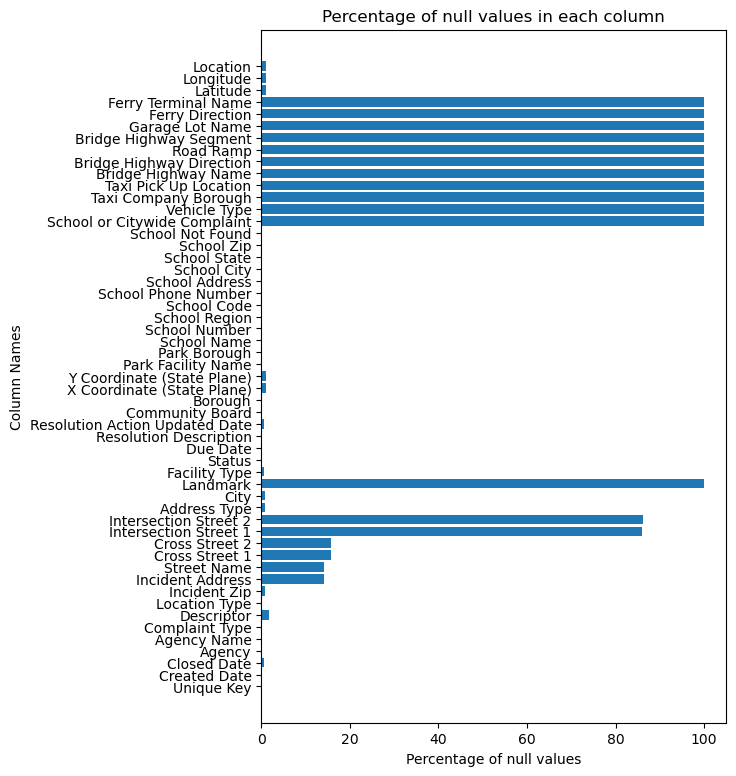

In [7]:
plt.figure(figsize=(6,9))
plt.barh(y=nullcol.index,width=nullcol)
plt.title("Percentage of null values in each column")
plt.xlabel("Percentage of null values")
plt.ylabel("Column Names")
plt.show()

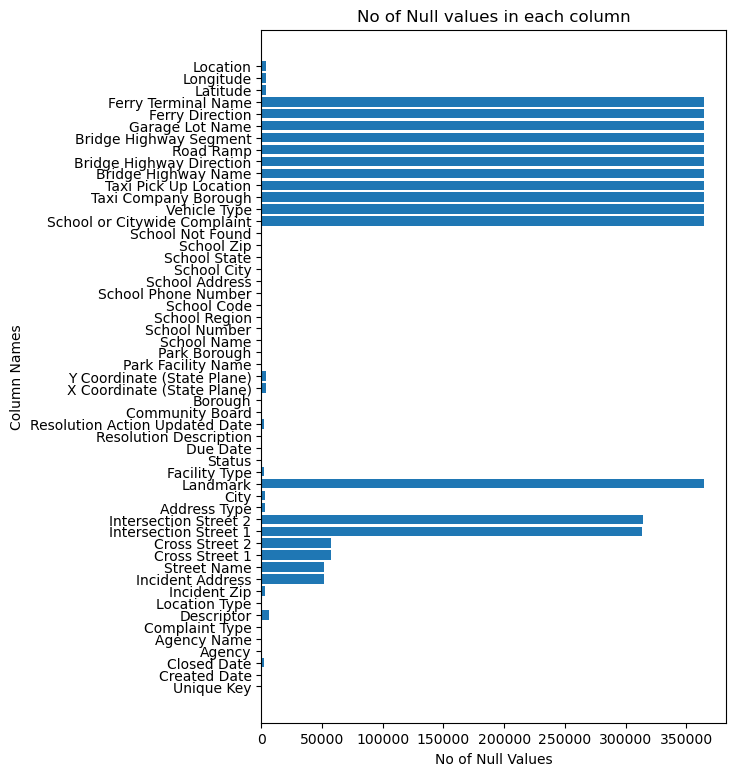

In [8]:
# Frequency plot of null column vlaues 
nullcount = df.isnull().sum()
plt.figure(figsize=(6,9))
plt.barh(y=nullcol.index,width=nullcount)
plt.title("No of Null values in each column")
plt.xlabel("No of Null Values")
plt.ylabel("Column Names")
plt.show()

In [9]:
#Dropping all columns whose percentage of nul values is greater than 20%
l = []
for a in df.columns:
    if df[a].isnull().sum()/len(df) >= 0.2:
        l.append(a)
df.drop(axis = 1, columns=l,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

### As the number of null values for closed date is less than 5 % , we drop those rows as we cant fetch anything about duration of time taken to close the complaint

In [10]:
#Droping all the records where Closed Date is null
df = df[~df['Closed Date'].isnull()]

## Request Closing Time Column 
This column gives the time taken to close the request i.e difference between closing time and creation time.

In [11]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [12]:
df['time_elapsed'] = df['Closed Date'] - df['Created Date']

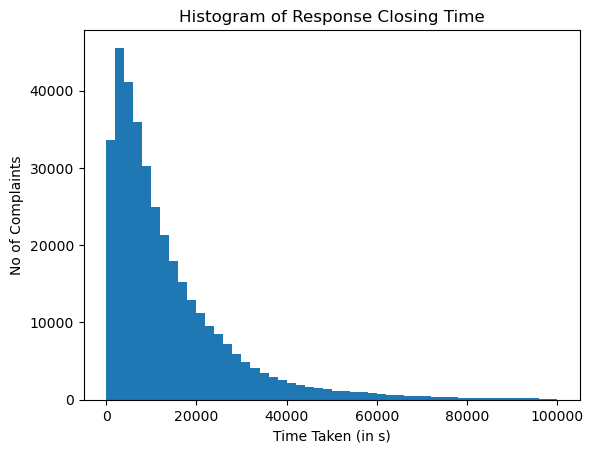

In [13]:
df['Request_Closing_Time'] = df['time_elapsed'].astype('timedelta64[s]')
plt.hist(df['Request_Closing_Time'],bins=50,range=(0,100000))
plt.xlabel("Time Taken (in s)")
plt.ylabel("No of Complaints")
plt.title("Histogram of Response Closing Time")
plt.show()

We can pobserve that the distribution of Request Closing Time Column is highly scewed towards right.

In [14]:
print(df['time_elapsed'].describe())
print(df['Request_Closing_Time'].describe())

count                       362177
mean     0 days 04:11:53.299632500
std      0 days 05:51:42.547519569
min                0 days 00:01:01
25%                0 days 01:15:33
50%                0 days 02:40:16
75%                0 days 05:14:38
max               24 days 16:52:22
Name: time_elapsed, dtype: object
count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64


### Finding Null Values in Complaint Type And City Column

In [15]:
# No Of Null values in the Complaint Type Column
df['Complaint Type'].isnull().sum()

0

In [16]:
# No Of Null values in the City Column
df['City'].isnull().sum()

674

### Replacing Null Values with Unknown City 

In [17]:
df['City'].fillna('Unknown City',inplace=True)

In [18]:
df['City'].value_counts()

BROOKLYN               118849
NEW YORK                77289
BRONX                   49166
STATEN ISLAND           15335
JAMAICA                  8930
ASTORIA                  7991
FLUSHING                 7486
RIDGEWOOD                6391
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3557
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3117
WOODHAVEN                3102
LONG ISLAND CITY         3027
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2333
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2105
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [19]:
a = df['City'].value_counts(ascending=False)

### Represenrting Total Number of Complaints in Each City

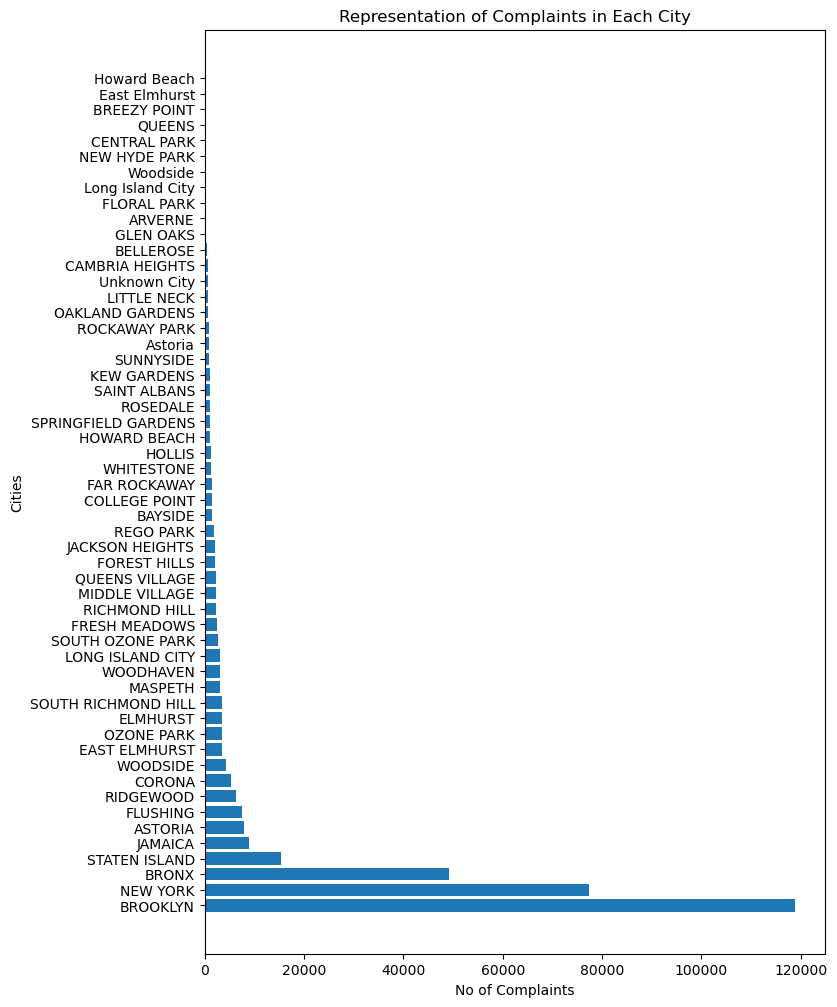

In [20]:
plt.figure(figsize=(8,12))
plt.barh(y=a.index,width=a)
plt.xlabel('No of Complaints')
plt.ylabel('Cities')
plt.title('Representation of Complaints in Each City')
plt.show()

In [21]:
### Density of Complaints in different locations in Brooklyn

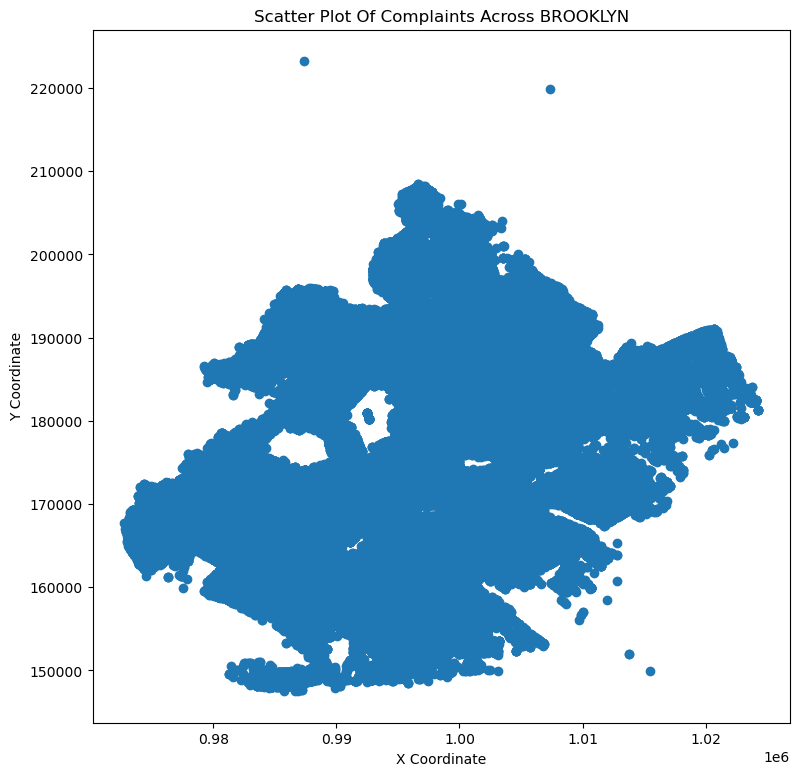

In [22]:
brooklyn = df[df['City']=='BROOKLYN']
plt.figure(figsize=(9,9))
plt.scatter(x=brooklyn['X Coordinate (State Plane)'],y=brooklyn['Y Coordinate (State Plane)'])
plt.ylabel("Y Coordinate")
plt.xlabel("X Coordinate")
plt.title("Scatter Plot Of Complaints Across BROOKLYN")
plt.show()

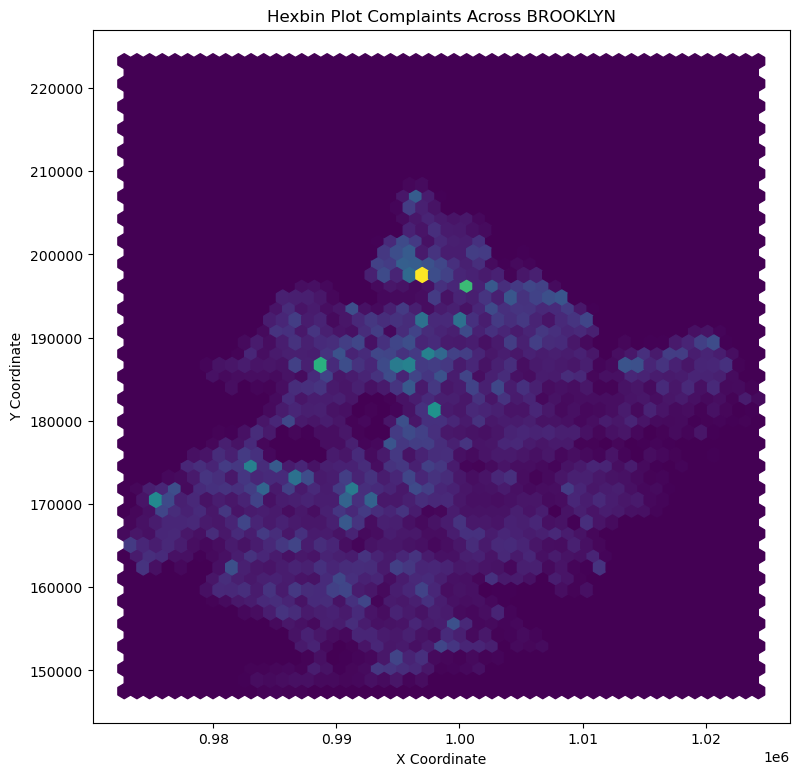

In [23]:
plt.figure(figsize=(9,9))
plt.hexbin(x=brooklyn['X Coordinate (State Plane)'],y=brooklyn['Y Coordinate (State Plane)'], gridsize=50,cmap="viridis")
plt.ylabel("Y Coordinate")
plt.xlabel("X Coordinate")
plt.title("Hexbin Plot Complaints Across BROOKLYN")
plt.show()

### No of Complaints of Each Type


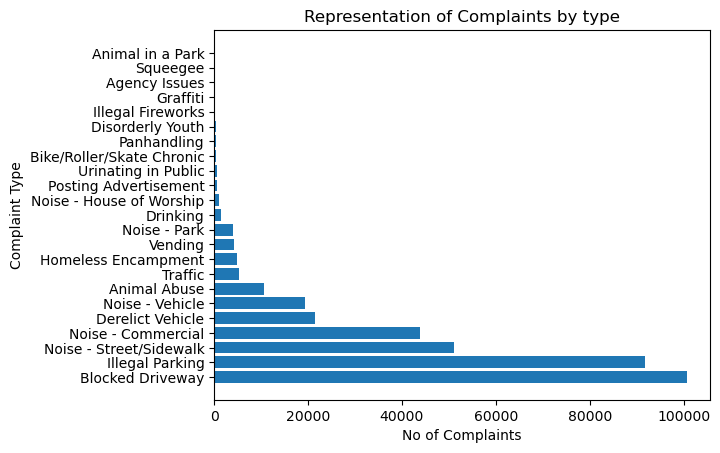

In [24]:
plt.barh(y=df['Complaint Type'].value_counts().index, width = df['Complaint Type'].value_counts())
plt.xlabel('No of Complaints')
plt.ylabel('Complaint Type')
plt.title('Representation of Complaints by type')
plt.show()

### No of Complaints of Each Type in NYC

In [25]:
new_york = df[df['City']=="NEW YORK"]['Complaint Type'].value_counts(ascending=False)

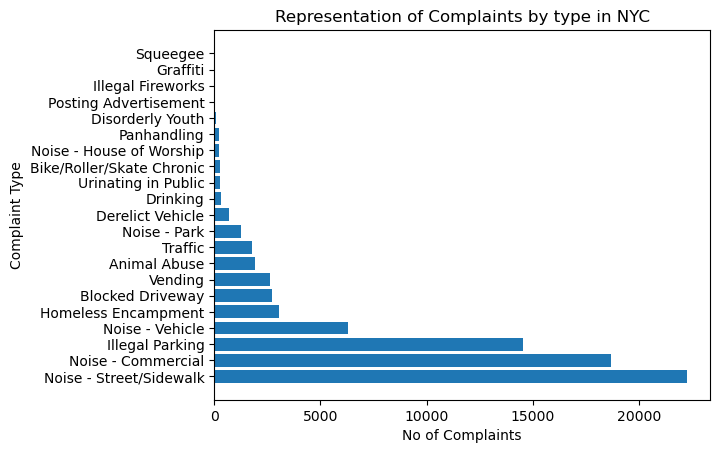

In [26]:
plt.barh(y=new_york.index, width = new_york)
plt.xlabel('No of Complaints')
plt.ylabel('Complaint Type')
plt.title('Representation of Complaints by type in NYC')
plt.show()

#### Top 10 Complaints 

In [27]:
# Top 10 Complaints 
print(df['Complaint Type'].value_counts(ascending=False)[:10])

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64


## Complaint Types ACross Different Cities

In [28]:
# Complaint Types Across Various Cities 
ct = df.groupby(['City'])['Complaint Type'].value_counts().unstack()
ct

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,1.0,4.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,4.0,32.0,...,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,3.0,2.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17062.0,2402.0,66.0,206.0,15.0,275.0,...,90.0,548.0,9144.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,NaN,3191.0,NaN,124.0,36445.0,6257.0,79.0,291.0,60.0,948.0,...,389.0,1575.0,13982.0,5965.0,49.0,58.0,NaN,1258.0,155.0,575.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,6.0,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN


In [29]:
df_new = df.groupby(['Complaint Type'])['City'].value_counts().unstack()
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
Animal Abuse,46.0,170.0,NaN,53.0,15.0,2.0,1971.0,3191.0,15.0,NaN,...,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,16.0,NaN,NaN,1.0,NaN,22.0,124.0,NaN,NaN,...,1.0,1.0,NaN,10.0,2.0,2.0,4.0,2.0,5.0,NaN
Blocked Driveway,50.0,3436.0,159.0,514.0,138.0,3.0,17062.0,36445.0,177.0,NaN,...,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2038.0,27.0
Derelict Vehicle,32.0,426.0,14.0,231.0,120.0,3.0,2402.0,6257.0,148.0,NaN,...,425.0,356.0,267.0,2184.0,17.0,63.0,279.0,369.0,298.0,8.0
Disorderly Youth,2.0,5.0,NaN,2.0,2.0,NaN,66.0,79.0,NaN,NaN,...,2.0,2.0,NaN,25.0,2.0,NaN,1.0,NaN,1.0,NaN
Drinking,1.0,43.0,NaN,1.0,1.0,1.0,206.0,291.0,NaN,NaN,...,14.0,25.0,6.0,188.0,12.0,3.0,3.0,4.0,15.0,NaN
Graffiti,1.0,4.0,NaN,3.0,NaN,NaN,15.0,60.0,NaN,NaN,...,2.0,NaN,NaN,6.0,1.0,NaN,1.0,NaN,4.0,NaN


<Axes: ylabel='City'>

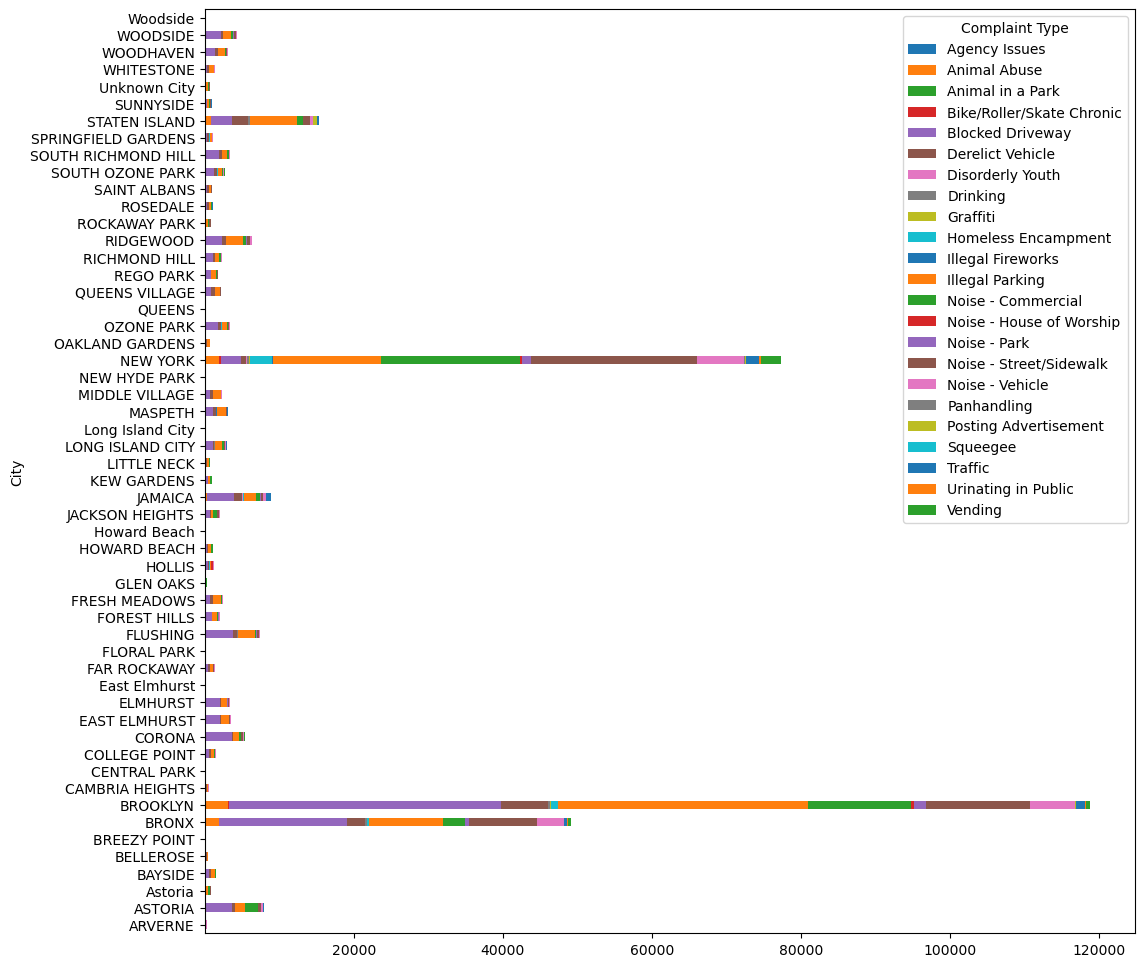

In [30]:
#Visualizing Complaint Types In Each City
plt.rcParams["figure.figsize"] = [12,12]
ct.plot(kind = "barh",stacked = True)

In [31]:
### Average Response Closing Time By Each Complaint Type

In [32]:
comp = pd.DataFrame(df.groupby(['Location Type'])['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')
comp

,Request_Closing_Time
Location Type,
Subway Station,8.707200e+03
Club/Bar/Restaurant,1.100953e+04
House of Worship,1.140317e+04
Store/Commercial,1.157573e+04
Highway,1.226234e+04
Park/Playground,1.239568e+04
Bridge,1.376750e+04
Street/Sidewalk,1.566318e+04
Residential Building,1.603562e+04


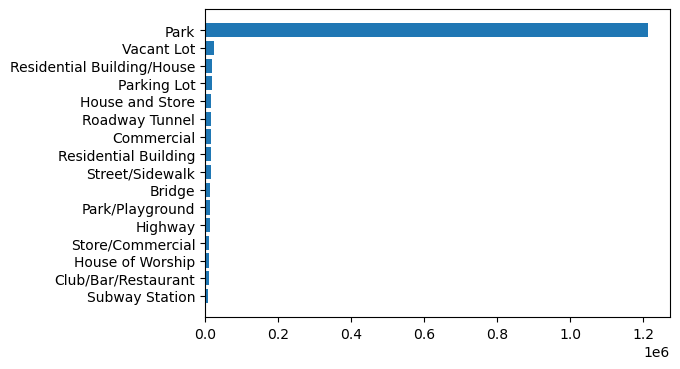

In [33]:
plt.figure(figsize=(6,4))
plt.barh(y = comp.index, width =comp['Request_Closing_Time'])
plt.show()

### In this dataset , We are trying to analyse which fators are responsible for variation in Closing time of each complaint's request
 We need to identify the factors responsible for variation in average response time for closing a complaint

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      362177 non-null  int64          
 1   Created Date                    362177 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          362177 non-null  object         
 4   Agency Name                     362177 non-null  object         
 5   Complaint Type                  362177 non-null  object         
 6   Descriptor                      355681 non-null  object         
 7   Location Type                   362047 non-null  object         
 8   Incident Zip                    361502 non-null  float64        
 9   Incident Address                310491 non-null  object         
 10  Street Name                     310491 non-n

On carefully observing the data, we can see that all of the variables except key (serving as index), latitude , longitude ,X coordinate , Y coordinate are object type.
It doesnt make any sense to perform a statistical analysis on a cattegorical data with large no of unique values.

Opening And Closing Date are time seies data , So we are not taking them into account although there may be variation of data on the basis of month of filing complaint.

In [35]:
for a in df.columns:
    print(a,df[a].unique().size)

Unique Key 362177
Created Date 359655
Closed Date 339837
Agency 1
Agency Name 3
Complaint Type 23
Descriptor 44
Location Type 17
Incident Zip 202
Incident Address 125178
Street Name 7214
Cross Street 1 6102
Cross Street 2 6065
Address Type 6
City 54
Facility Type 2
Status 4
Due Date 359655
Resolution Description 14
Resolution Action Updated Date 340821
Community Board 75
Borough 6
X Coordinate (State Plane) 68411
Y Coordinate (State Plane) 79924
Park Facility Name 2
Park Borough 6
School Name 2
School Number 2
School Region 2
School Code 2
School Phone Number 2
School Address 2
School City 2
School State 2
School Zip 2
School Not Found 1
Latitude 146733
Longitude 146466
Location 146744
time_elapsed 56190
Request_Closing_Time 56190


#### As specified earlier , we want to remove categorical columns with a lot of values.
#### Removing all columns with more than 100 values 

In [36]:
# Preserving the Response Time 
x = df['Request_Closing_Time']
remove = []
for a in df.columns:
    if df[a].nunique()>50:
        remove.append(a)
df.drop(axis = 1, columns=remove, inplace = True)
df['Request_Closing_Time'] = x

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Agency                  362177 non-null  object 
 1   Agency Name             362177 non-null  object 
 2   Complaint Type          362177 non-null  object 
 3   Descriptor              355681 non-null  object 
 4   Location Type           362047 non-null  object 
 5   Address Type            361248 non-null  object 
 6   Facility Type           362159 non-null  object 
 7   Status                  362177 non-null  object 
 8   Resolution Description  362177 non-null  object 
 9   Borough                 362177 non-null  object 
 10  Park Facility Name      362177 non-null  object 
 11  Park Borough            362177 non-null  object 
 12  School Name             362177 non-null  object 
 13  School Number           362177 non-null  object 
 14  School Region       

I am suspicious of those columns having 1 or 2 unique values . Lets check their values.
Eg - School Zip cant have only 2 unique values .

In [38]:
check = []
for a in df.columns:
    if df[a].nunique()<=4:
        print(df[a].unique())
        check.append(a)

['NYPD']
['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
['Precinct' nan]
['Closed' 'Open' 'Draft' 'Assigned']
['Unspecified' 'Alley Pond Park - Nature Center']
['Unspecified' 'Alley Pond Park - Nature Center']
['Unspecified' 'Q001']
['Unspecified' nan]
['Unspecified' nan]
['Unspecified' '7182176034']
['Unspecified' 'Grand Central Parkway, near the soccer field']
['Unspecified' 'QUEENS']
['Unspecified' 'NY']
['Unspecified' nan]
['N']


#### As Suspected , All of these columns dont provide any usefull insights and therefore we must get rid of them.

In [39]:
df.drop(axis = 1,columns = check , inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Complaint Type          362177 non-null  object 
 1   Descriptor              355681 non-null  object 
 2   Location Type           362047 non-null  object 
 3   Address Type            361248 non-null  object 
 4   Resolution Description  362177 non-null  object 
 5   Borough                 362177 non-null  object 
 6   Park Borough            362177 non-null  object 
 7   Request_Closing_Time    362177 non-null  float64
dtypes: float64(1), object(7)
memory usage: 24.9+ MB


### Thus We need to check the influence of aboove 6 factors on Request Closing Time 

#### Checking through some of the variables whic I felt suspicious 

In [41]:
 df['Borough'].value_counts()

BROOKLYN         118851
QUEENS           100754
MANHATTAN         77439
BRONX             49164
STATEN ISLAND     15334
Unspecified         635
Name: Borough, dtype: int64

In [42]:
df['Park Borough'].value_counts()

BROOKLYN         118851
QUEENS           100754
MANHATTAN         77439
BRONX             49164
STATEN ISLAND     15334
Unspecified         635
Name: Park Borough, dtype: int64

In [43]:
df['Descriptor'].value_counts()

No Access                         75715
Loud Music/Party                  69080
Posted Parking Sign Violation     27013
Partial Access                    24909
Loud Talking                      23591
With License Plate                21518
Blocked Hydrant                   19797
Commercial Overnight Parking      14705
Blocked Sidewalk                  13711
Car/Truck Music                   11894
Double Parked Blocking Traffic     7057
Engine Idling                      5312
Double Parked Blocking Vehicle     5164
Neglected                          5125
Banging/Pounding                   4901
Car/Truck Horn                     4457
Congestion/Gridlock                3236
Other (complaint details)          2487
In Prohibited Area                 2205
Overnight Commercial Storage       2101
Unlicensed                         1980
Unauthorized Bus Layover           1589
Truck Route Violation              1124
Tortured                           1038
In Public                           967


In [44]:
 df['Resolution Description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                               107046
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                     

 As the values for borough andd park borough are same , We will proceed to drop park borough column 

In [45]:
df.drop(axis=1,inplace=True,columns=['Park Borough'])

## Understanding The Influence of 5 factors on Response Time 
We will perform annova test to check the influence of these factors on Response Time 

### Variation Of Response Time By Complaint Type

(0.0, 120000.0)

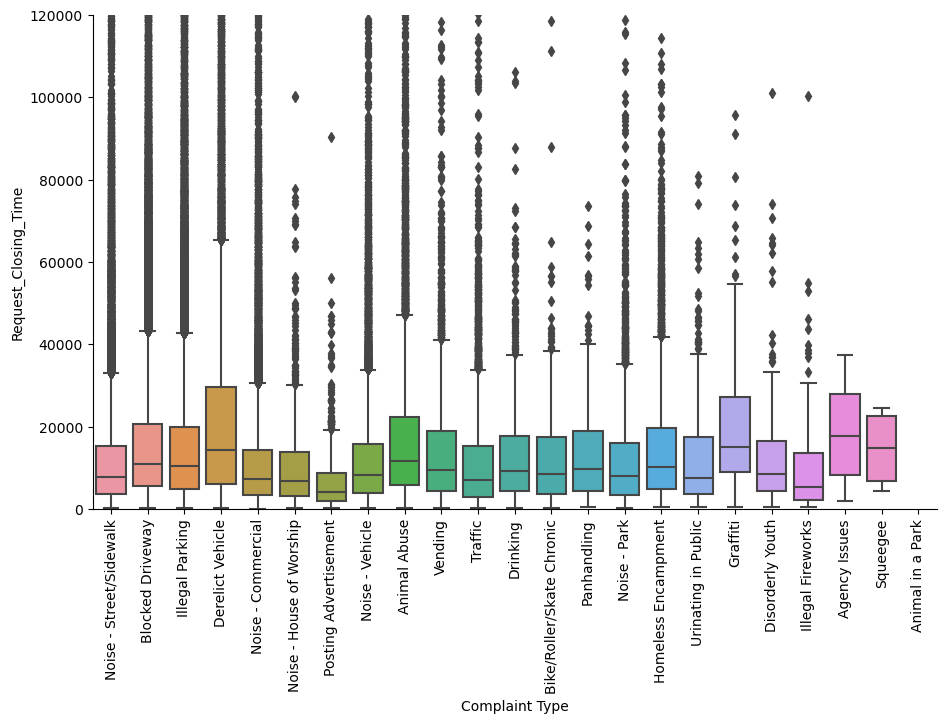

In [46]:
# Checking whether ResponseTime varies by each complaint type 
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=df)
g.fig.set_figheight(6)
g.fig.set_figwidth(12)
plt.xticks(rotation=90)
plt.ylim((0,120000))

**H0: there is no significant difference in mean of Request_Closing_Time for different Complaints**

**H1:there is signficant difference in mean of Request_Closing_Time for different Complaints**

In [47]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=df["Request_Closing_Time"]
anova_df["Complaint"]=df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,3330.0,Noise - Street/Sidewalk
1,5233.0,Blocked Driveway
2,17494.0,Blocked Driveway
3,27927.0,Illegal Parking
4,12464.0,Illegal Parking


In [48]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,5.354337e+12,2.433789e+11,565.26157,0.0
Residual,362154.0,1.559290e+14,4.305599e+08,NaN,NaN


    Because p value of approximately 0 is less than significance level of 0.01 , we reject H0. Thus , there is statistical   
    evidence that there is difference in mean of Request Closing Time for different Complaint types 

### Variation Of Response Time By Location Type

(0.0, 120000.0)

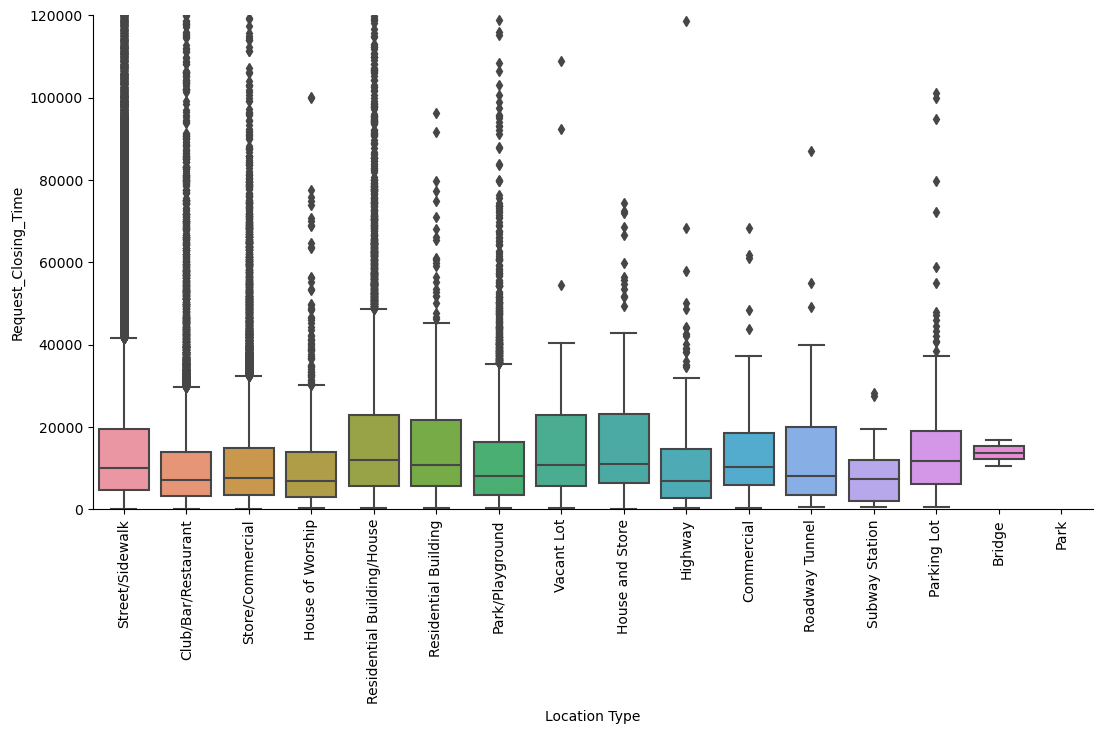

In [49]:
# Checking whether ResponseTime varies by location type 
g=sns.catplot(x="Location Type",y="Request_Closing_Time",kind="box",data=df)
g.fig.set_figheight(6)
g.fig.set_figwidth(12)
plt.xticks(rotation=90)
plt.ylim((0,120000))

**H0: there is no significant difference in mean of Request_Closing_Time for different Location types**

**H1:there is signficant difference in mean of Request_Closing_Time for different location types**

In [50]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=df["Request_Closing_Time"]
anova_df["Location"]=df["Location Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Location
0,3330.0,Street/Sidewalk
1,5233.0,Street/Sidewalk
2,17494.0,Street/Sidewalk
3,27927.0,Street/Sidewalk
4,12464.0,Street/Sidewalk


In [51]:
lm=ols("Request_Closing_Time~Location",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Location,15.0,2.337702e+12,1.558468e+11,355.056318,0.0
Residual,362031.0,1.589082e+14,4.389354e+08,NaN,NaN


    Because p value of approximately 0 is less than significance level of 0.01 , we reject H0. Thus , there is statistical   
    evidence that there is difference in mean of Request Closing Time for different Location types 

### Variation Of Response Time By Address Type

(0.0, 120000.0)

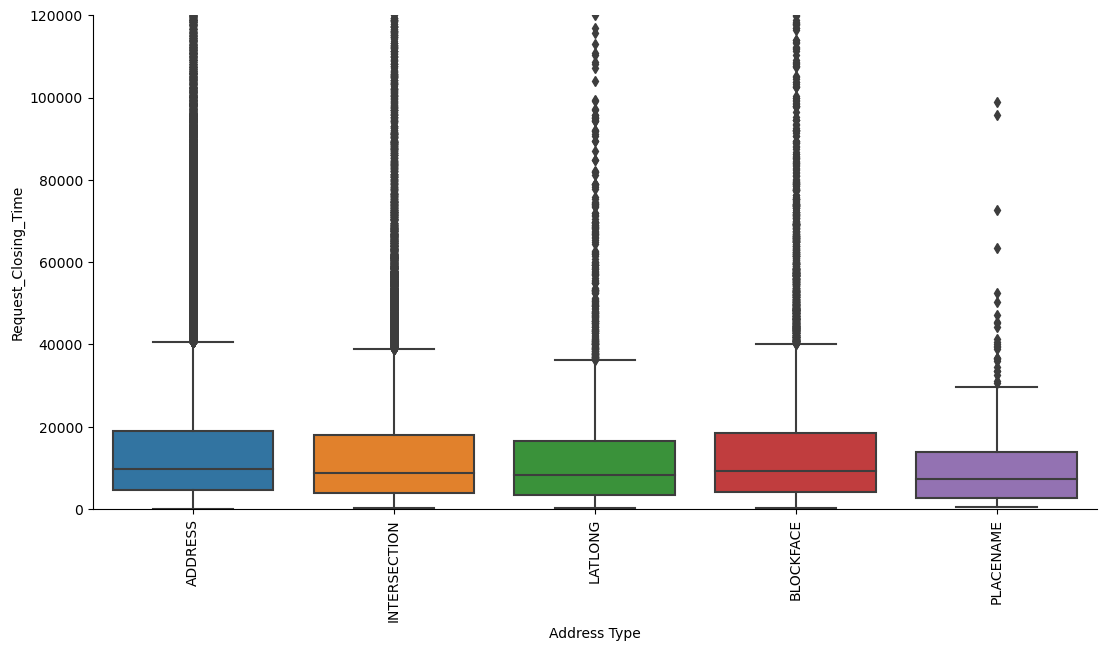

In [52]:
# Checking whether ResponseTime varies by Address type 
g=sns.catplot(x="Address Type",y="Request_Closing_Time",kind="box",data=df)
g.fig.set_figheight(6)
g.fig.set_figwidth(12)
plt.xticks(rotation=90)
plt.ylim((0,120000))

**H0: there is no significant difference in mean of Request_Closing_Time for different address types**

**H1:there is signficant difference in mean of Request_Closing_Time for different address types**

In [53]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=df["Request_Closing_Time"]
anova_df["Address"]=df["Address Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Address
0,3330.0,ADDRESS
1,5233.0,ADDRESS
2,17494.0,ADDRESS
3,27927.0,ADDRESS
4,12464.0,ADDRESS


In [54]:
lm=ols("Request_Closing_Time~Address",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Address,4.0,3.558830e+10,8.897075e+09,20.24854,1.077050e-16
Residual,361243.0,1.587278e+14,4.393934e+08,NaN,NaN


    Because p value of approximately 0 is less than significance level of 0.01 , we reject H0. Thus , there is statistical   
    evidence that there is difference in mean of Request Closing Time for different address types

Resolution Descriptor can not be analysed without using NLP techniques which is out of context of project domain.

### Variation Of Response Time By Descriptor Type

(0.0, 120000.0)

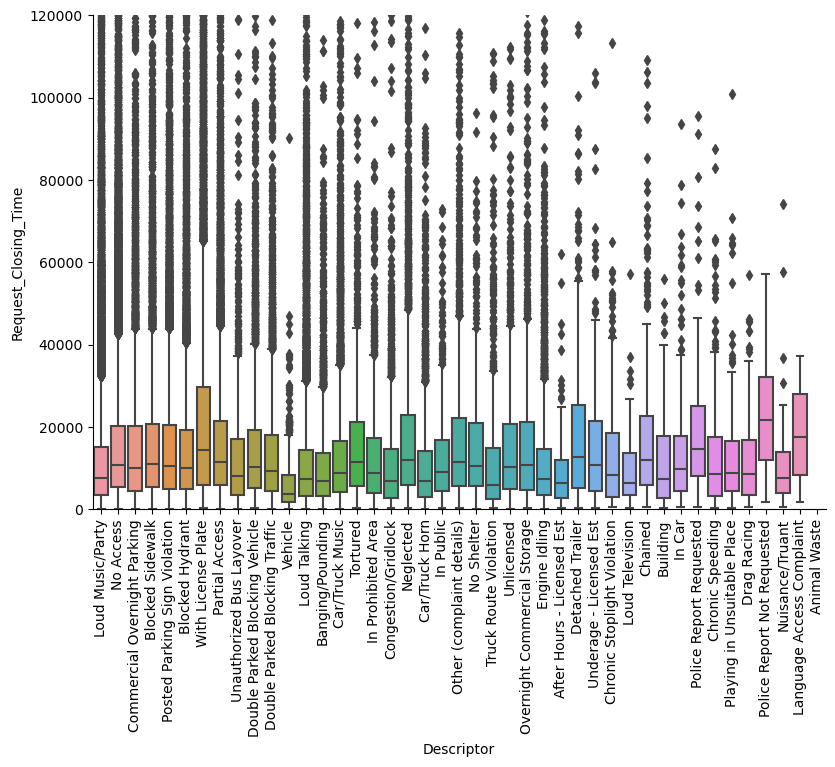

In [56]:
# Checking whether ResponseTime varies by Descriptor type 
g=sns.catplot(x="Descriptor",y="Request_Closing_Time",kind="box",data=df)
g.fig.set_figheight(6)
g.fig.set_figwidth(12)
plt.xticks(rotation=90)
plt.ylim((0,120000))

**H0: there is no significant difference in mean of Request_Closing_Time for different address types**

**H1:there is signficant difference in mean of Request_Closing_Time for different address types**

In [57]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=df["Request_Closing_Time"]
anova_df["Descriptor"]=df["Descriptor"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Descriptor
0,3330.0,Loud Music/Party
1,5233.0,No Access
2,17494.0,No Access
3,27927.0,Commercial Overnight Parking
4,12464.0,Blocked Sidewalk


In [58]:
lm=ols("Request_Closing_Time~Descriptor",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Descriptor,42.0,5.431059e+12,1.293109e+11,299.792889,0.0
Residual,355638.0,1.533988e+14,4.313342e+08,NaN,NaN


    Because p value of approximately 0 is less than significance level of 0.01 , we reject H0. Thus , there is statistical   
    evidence that there is difference in mean of Request Closing Time for different descriptors in complaints

## Chi Square Tests For Categorical variables

### Is there any assossciation between Complaint Type and City ?

In [59]:
df1 = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
df1[df1['City'].isnull()]['City'] = 'Unknown City'

In [60]:
df['City']=df1['City']

**H0 : There is no assossciation between Complaint Type and City Column**

**H1 : there is assossciation between Complaint Type and City Column**

In [61]:
chi_sq=pd.DataFrame()
chi_sq["City"]= df["City"]
chi_sq["Complaint Type"]= df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [62]:
data_crosstab = pd.crosstab( chi_sq["City"],chi_sq["Complaint Type"])

In [63]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


Therefore , We conclude that there is an assossciation among Complaint Type and City from where complaint is registered

### Is there any assossciation beteween Complaint Type and Location Type ?

**H0 : There is no assossciation between Complaint Type and Location Type**

**H1 : there is assossciation between Complaint Type and Location Type**

In [64]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=df["Location Type"]
chi_sq["Complaint Type"]=df["Complaint Type"]

chi_sq.dropna(inplace=True)
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


### Is there any assossciation beteween  Location Type and Description Of Complaint?

**H0 : There is no assossciation between Location Type and description of complaint**

**H1 : there is assossciation between Locationt Type and description of complaint**

Therefore , We conclude that there is an assossciation among Location Type and Descriptor

In [75]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=df["Location Type"]
chi_sq["Descriptor"]=df["Descriptor"]

chi_sq.dropna(inplace=True)
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Descriptor"])
stat, p, dof, expected = chi2_contingency(data_crosstab) 
alpha = 0.01
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


## Conclusion

### Analysis 

* Reuest Closing Time is higlly skewed to the right which indicates that a few requests took a long time to get solved as compared to the most of them
* Maority of requests in datset are from New York , Brooklyn and Bronx
* Most complaints received are related to Blocked Driveways, Illegal Parking and noise on sidewalks which varies among cities though
* Complaints related to park take way more time to get solved than other ones


### Inferences 

Request Closing Time is majorly dependent on following factors :
 * City 
 * Location Type
 * Complaint Type 
 * Park Borough Type
 * Address Type 
 * Descriptor Of Complaint 
 
There has also been found strong assossciation between Complaint Type and Location Type, Complaint Type and City where complaint was reported and also between location type and descriptor of complaint  
    

# Thank You.